In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


=== Logistic Regression ===
Accuracy: 0.8671
F1 Score: 0.8065
Confusion Matrix:
[[   24  4896]
 [   20 32044]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.00      0.01      4920
           1       0.87      1.00      0.93     32064

    accuracy                           0.87     36984
   macro avg       0.71      0.50      0.47     36984
weighted avg       0.82      0.87      0.81     36984


=== Decision Tree ===
Accuracy: 0.8892
F1 Score: 0.8910
Confusion Matrix:
[[ 3059  1861]
 [ 2235 29829]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      4920
           1       0.94      0.93      0.94     32064

    accuracy                           0.89     36984
   macro avg       0.76      0.78      0.77     36984
weighted avg       0.89      0.89      0.89     36984


=== Random Forest ===
Accuracy: 0.8985
F1 Score: 0.8928
Confusion Matrix:
[[ 2479

c:\Users\woori\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:30:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8823
F1 Score: 0.8466
Confusion Matrix:
[[  780  4140]
 [  214 31850]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.16      0.26      4920
           1       0.88      0.99      0.94     32064

    accuracy                           0.88     36984
   macro avg       0.83      0.58      0.60     36984
weighted avg       0.87      0.88      0.85     36984



C:\Users\woori\AppData\Local\Temp\ipykernel_19544\3451604464.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values(by='Accuracy', ascending=False), palette='viridis')


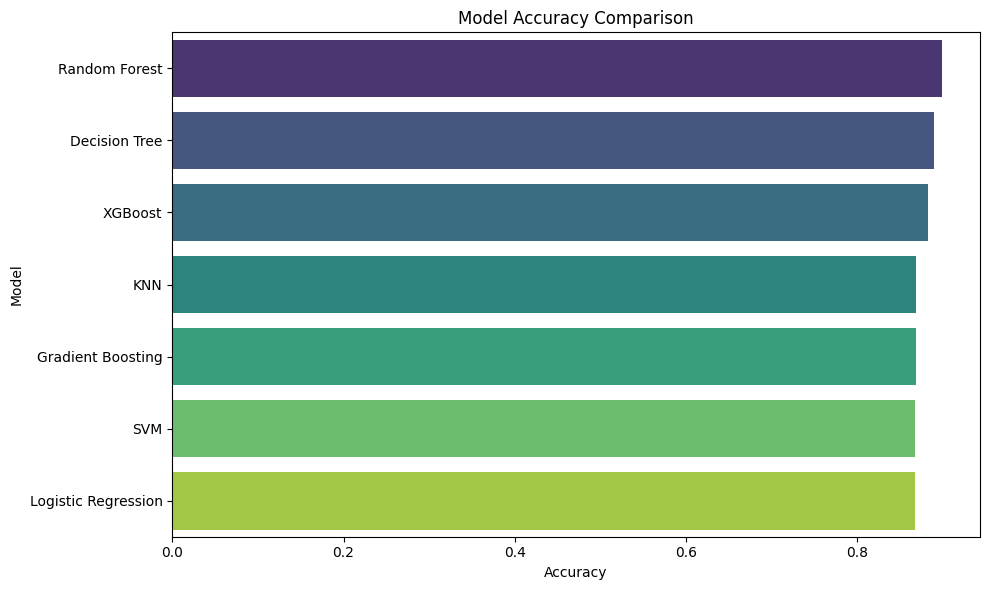

C:\Users\woori\AppData\Local\Temp\ipykernel_19544\3451604464.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1 Score', y='Model', data=results_df.sort_values(by='F1 Score', ascending=False), palette='viridis')


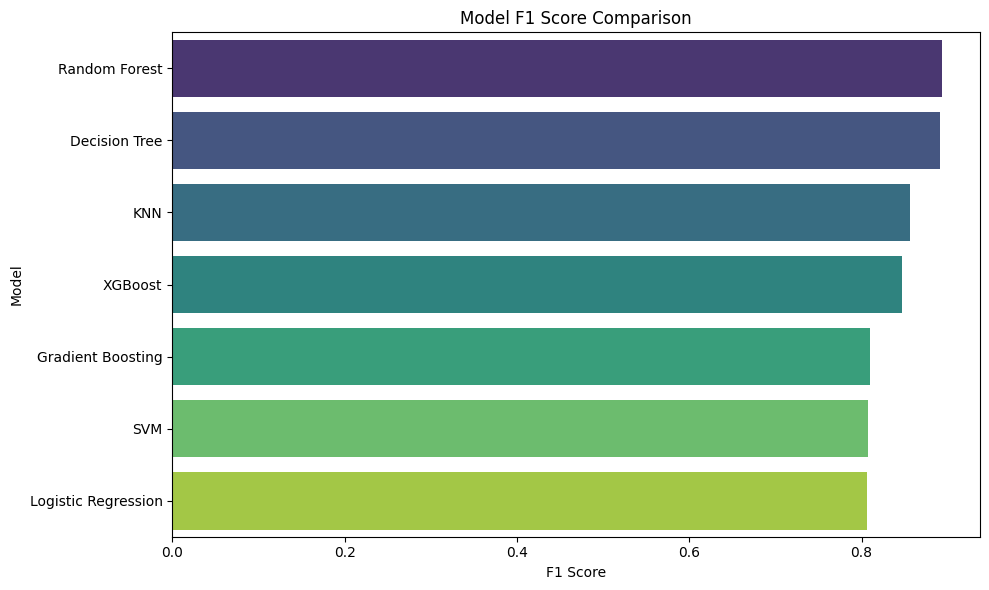


=== Final Model Comparison ===
                 Model  Accuracy  F1 Score
2        Random Forest  0.898524  0.892826
1        Decision Tree  0.889249  0.890952
6              XGBoost  0.882273  0.846593
5                  KNN  0.868754  0.855944
3    Gradient Boosting  0.868294  0.809345
4                  SVM  0.867943  0.807852
0  Logistic Regression  0.867078  0.806491


In [10]:

# 데이터 로드
data = pd.read_csv('./data/merged_data_cleaned.csv')

# 1. 데이터 준비
X = data.drop(columns=['final_result','id_student', 'id_assessment','code_module'])  # 피처
y = data['final_result']  # 타겟 변수

# 2. 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 스케일링 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 분류 알고리즘 리스트
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# 5. 모델 학습 및 평가
results = []

for name, model in models.items():
    print(f"\n=== {name} ===")
    # 모델 학습
    model.fit(X_train_scaled, y_train)
    # 예측
    y_pred = model.predict(X_test_scaled)
    # 평가
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    # 결과 저장
    results.append((name, acc, f1))

# 6. 결과 비교 시각화
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values(by='Accuracy', ascending=False), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='F1 Score', y='Model', data=results_df.sort_values(by='F1 Score', ascending=False), palette='viridis')
plt.title("Model F1 Score Comparison")
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# 최종 결과 출력
print("\n=== Final Model Comparison ===")
print(results_df.sort_values(by='Accuracy', ascending=False))



=== 기본 Logistic Regression 성능 ===
Accuracy: 0.8671
F1 Score: 0.8065

Confusion Matrix:
[[   24  4896]
 [   20 32044]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.00      0.01      4920
           1       0.87      1.00      0.93     32064

    accuracy                           0.87     36984
   macro avg       0.71      0.50      0.47     36984
weighted avg       0.82      0.87      0.81     36984


=== 하이퍼파라미터 최적화 후 Logistic Regression 성능 ===
Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Best Accuracy: 0.8671
Best F1 Score: 0.8065


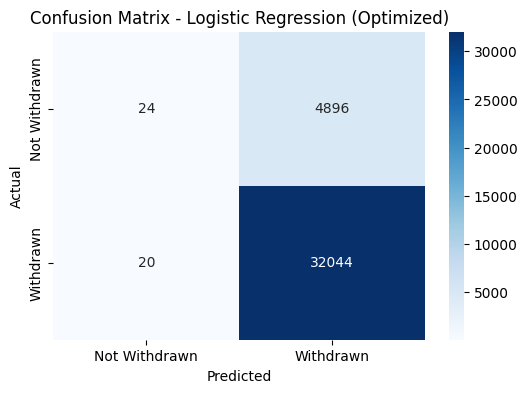

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# 1. 데이터 로드
data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. 데이터 준비 (X: Feature, y: Target)
X = data.drop(columns=['final_result', 'id_student', 'id_assessment', 'code_module'])  # 피처
y = data['final_result']  # 타겟 변수

# 3. 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. 스케일링 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 기본 로지스틱 회귀 모델 적용
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

# 6. 성능 평가 (기본 모델)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n=== 기본 Logistic Regression 성능 ===")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. 하이퍼파라미터 튜닝 (GridSearchCV)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # 규제 강도 (작을수록 강한 규제)
    'solver': ['liblinear', 'lbfgs']  # 최적화 알고리즘
}

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 8. 최적의 하이퍼파라미터 및 성능 확인
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("\n=== 하이퍼파라미터 최적화 후 Logistic Regression 성능 ===")
print(f"Best Parameters: {best_params}")

# 9. 최적 모델 평가
y_pred_best = best_model.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Best Accuracy: {acc_best:.4f}")
print(f"Best F1 Score: {f1_best:.4f}")

# 10. 혼동행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Withdrawn', 'Withdrawn'], yticklabels=['Not Withdrawn', 'Withdrawn'])
plt.title("Confusion Matrix - Logistic Regression (Optimized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



=== 기본 Decision Tree 성능 ===
Accuracy: 0.8892
F1 Score: 0.8910

Confusion Matrix:
[[ 3059  1861]
 [ 2235 29829]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      4920
           1       0.94      0.93      0.94     32064

    accuracy                           0.89     36984
   macro avg       0.76      0.78      0.77     36984
weighted avg       0.89      0.89      0.89     36984


=== 하이퍼파라미터 최적화 후 Decision Tree 성능 ===
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.8924
Best F1 Score: 0.8939


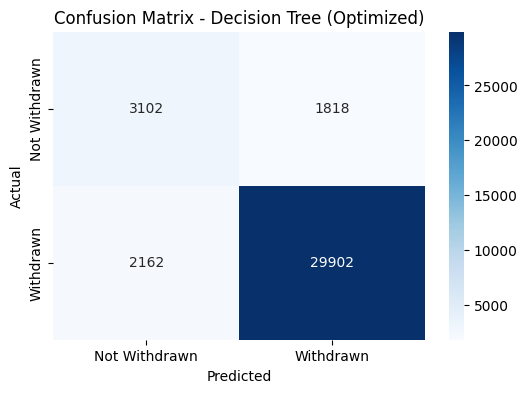

C:\Users\woori\AppData\Local\Temp\ipykernel_16856\2272514129.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


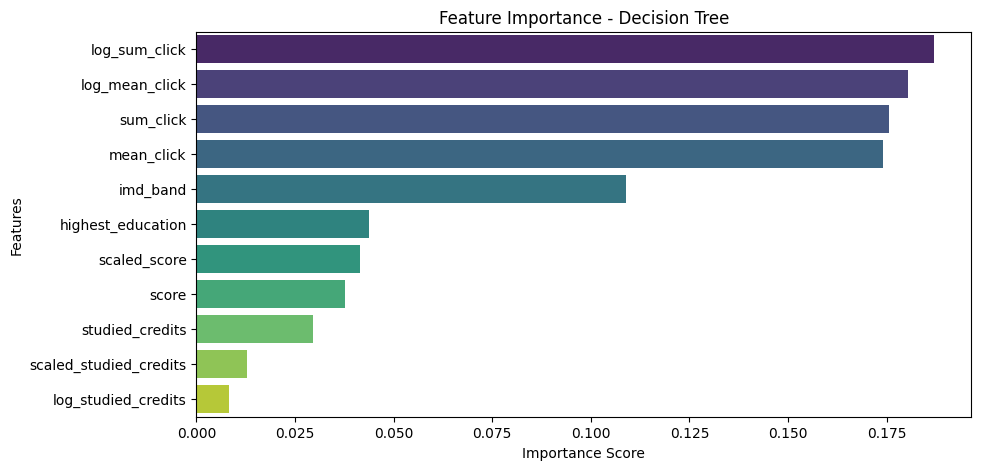

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# 1. 데이터 로드
data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. 데이터 준비 (X: Feature, y: Target)
X = data.drop(columns=['final_result', 'id_student','id_assessment','code_module'])  # 피처
y = data['final_result']  # 타겟 변수

# 3. 학습 데이터와 테스트 데이터 분리 (Train 80%, Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. 스케일링 (결정 트리는 필요 없지만 일관성을 위해 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 기본 결정 트리 모델 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred = dt_model.predict(X_test_scaled)

# 6. 성능 평가 (기본 모델)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n=== 기본 Decision Tree 성능 ===")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. 하이퍼파라미터 튜닝 (GridSearchCV)
param_grid = {
    'max_depth': [3, 5, 10, 20, None],  # 트리 깊이
    'min_samples_split': [2, 5, 10],  # 내부 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드 최소 샘플 수
    'criterion': ['gini', 'entropy']  # 분할 기준
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 8. 최적의 하이퍼파라미터 및 성능 확인
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("\n=== 하이퍼파라미터 최적화 후 Decision Tree 성능 ===")
print(f"Best Parameters: {best_params}")

# 9. 최적 모델 평가
y_pred_best = best_model.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Best Accuracy: {acc_best:.4f}")
print(f"Best F1 Score: {f1_best:.4f}")

# 10. 혼동행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Withdrawn', 'Withdrawn'], yticklabels=['Not Withdrawn', 'Withdrawn'])
plt.title("Confusion Matrix - Decision Tree (Optimized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 11. Feature Importance 시각화
feature_importances = pd.Series(best_model.feature_importances_, index=data.drop(columns=['final_result','id_student','id_assessment','code_module']).columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, make_scorer

if __name__ == "__main__":
    # 1. 데이터 로드
    data = pd.read_csv('./data/merged_data_cleaned.csv')

    # 2. 데이터 준비 (X: Feature, y: Target)
    X = data.drop(columns=['final_result', 'id_student','id_assessment','code_module']).to_numpy().astype(np.float64)  # ✅ NumPy 변환 (속도 개선)
    y = data['final_result'].to_numpy()

    # 3. 학습 데이터와 테스트 데이터 분리 (Train 80%, Test 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # 4. 스케일링 (랜덤 포레스트는 필요 없지만 일관성을 위해 적용)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train).astype(np.float64)  # ✅ NumPy 변환
    X_test_scaled = scaler.transform(X_test).astype(np.float64)

    # 5. 기본 랜덤 포레스트 모델 학습
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)

    # 6. 성능 평가 (기본 모델)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n=== 기본 Random Forest 성능 ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 7. 하이퍼파라미터 튜닝 (GridSearchCV)
    param_grid = {
        'n_estimators': [100, 200],  # ✅ 튜닝 범위 축소
        'max_depth': [5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'criterion': ['gini', 'entropy']
    }

    scorer = make_scorer(accuracy_score)  # ✅ make_scorer 사용
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring=scorer, n_jobs=1)  # ✅ n_jobs=1 설정
    grid_search.fit(X_train_scaled, y_train)

    # 8. 최적의 하이퍼파라미터 및 성능 확인
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print("\n=== 하이퍼파라미터 최적화 후 Random Forest 성능 ===")
    print(f"Best Parameters: {best_params}")

    # 9. 최적 모델 평가
    y_pred_best = best_model.predict(X_test_scaled)
    acc_best = accuracy_score(y_test, y_pred_best)
    f1_best = f1_score(y_test, y_pred_best, average='weighted')

    print(f"Best Accuracy: {acc_best:.4f}")
    print(f"Best F1 Score: {f1_best:.4f}")

    # 10. 혼동 행렬 시각화
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Withdrawn', 'Withdrawn'], yticklabels=['Not Withdrawn', 'Withdrawn'])
    plt.title("Confusion Matrix - Random Forest (Optimized)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # 11. Feature Importance 시각화
    feature_importances = pd.Series(best_model.feature_importances_, index=data.drop(columns=['final_result','id_student','id_assessment','code_module']).columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
    plt.title("Feature Importance - Random Forest")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()



=== 기본 Random Forest 성능 ===
Accuracy: 0.8985
F1 Score: 0.8928

Confusion Matrix:
[[ 2479  2441]
 [ 1312 30752]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.50      0.57      4920
           1       0.93      0.96      0.94     32064

    accuracy                           0.90     36984
   macro avg       0.79      0.73      0.76     36984
weighted avg       0.89      0.90      0.89     36984



KeyboardInterrupt: 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from scipy.stats import randint

if __name__ == "__main__":
    # 1. 데이터 로드
    data = pd.read_csv('./data/merged_data_cleaned.csv')

    # 2. 데이터 준비 (X: Feature, y: Target)
    X = data.drop(columns=['final_result']).to_numpy().astype(np.float64)  # ✅ NumPy 변환으로 속도 개선
    y = data['final_result'].to_numpy()

    # 3. 학습 데이터와 테스트 데이터 분리 (Train 80%, Test 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # 4. 스케일링 (랜덤 포레스트는 필요 없지만 일관성을 위해 적용)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train).astype(np.float64)
    X_test_scaled = scaler.transform(X_test).astype(np.float64)

    # 5. 기본 랜덤 포레스트 모델 학습
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)  # ✅ 트리 개수 & 깊이 제한으로 속도 개선
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)

    # 6. 성능 평가 (기본 모델)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n=== 기본 Random Forest 성능 ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 7. **빠른 하이퍼파라미터 튜닝 (RandomizedSearchCV)**
    param_dist = {
        'n_estimators': randint(50, 150),  # ✅ 트리 개수를 50~150으로 축소 (속도 개선)
        'max_depth': [5, 10, 15, None],  # ✅ 트리 깊이를 제한하여 과적합 방지 & 속도 개선
        'min_samples_split': [2, 5],  # ✅ 탐색 범위 최소화
        'min_samples_leaf': [1, 2],  # ✅ 탐색 범위 최소화
        'criterion': ['gini', 'entropy']
    }

    random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                       param_distributions=param_dist,
                                       n_iter=10,  # ✅ 조합 개수 10개로 제한 (속도 개선)
                                       cv=3,  # ✅ 교차 검증 수를 3으로 줄여 속도 개선
                                       scoring='accuracy',
                                       n_jobs=-1,
                                       random_state=42)
    random_search.fit(X_train_scaled, y_train)

    # 8. 최적의 하이퍼파라미터 및 성능 확인
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    print("\n=== 하이퍼파라미터 최적화 후 Random Forest 성능 ===")
    print(f"Best Parameters: {best_params}")

    # 9. 최적 모델 평가
    y_pred_best = best_model.predict(X_test_scaled)
    acc_best = accuracy_score(y_test, y_pred_best)
    f1_best = f1_score(y_test, y_pred_best, average='weighted')

    print(f"Best Accuracy: {acc_best:.4f}")
    print(f"Best F1 Score: {f1_best:.4f}")

    # 10. 혼동 행렬 시각화
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Withdrawn', 'Withdrawn'], yticklabels=['Not Withdrawn', 'Withdrawn'])
    plt.title("Confusion Matrix - Random Forest (Optimized)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # 11. Feature Importance 시각화
    feature_importances = pd.Series(best_model.feature_importances_, index=data.drop(columns=['final_result','id_student','id_assessment','code_module']).columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
    plt.title("Feature Importance - Random Forest")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()


KeyboardInterrupt: 


=== 기본 Random Forest 성능 ===
Accuracy: 0.8990
F1 Score: 0.8934
R2 Score: 0.1241

Confusion Matrix:
[[ 2495  2425]
 [ 1311 30753]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.51      0.57      4920
           1       0.93      0.96      0.94     32064

    accuracy                           0.90     36984
   macro avg       0.79      0.73      0.76     36984
weighted avg       0.89      0.90      0.89     36984


=== 하이퍼파라미터 최적화 후 Random Forest 성능 ===
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 157}
Best Accuracy: 0.9002
Best F1 Score: 0.8947
Best R2 Score: 0.1349


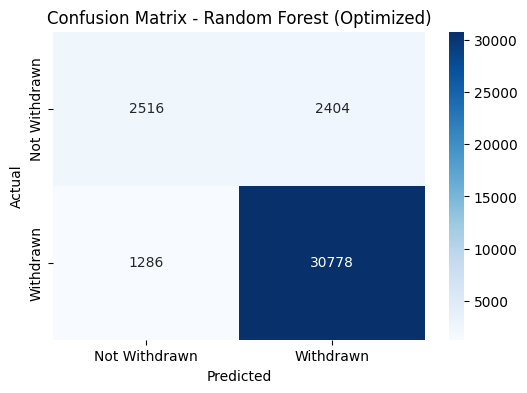

C:\Users\woori\AppData\Local\Temp\ipykernel_16856\2041191032.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


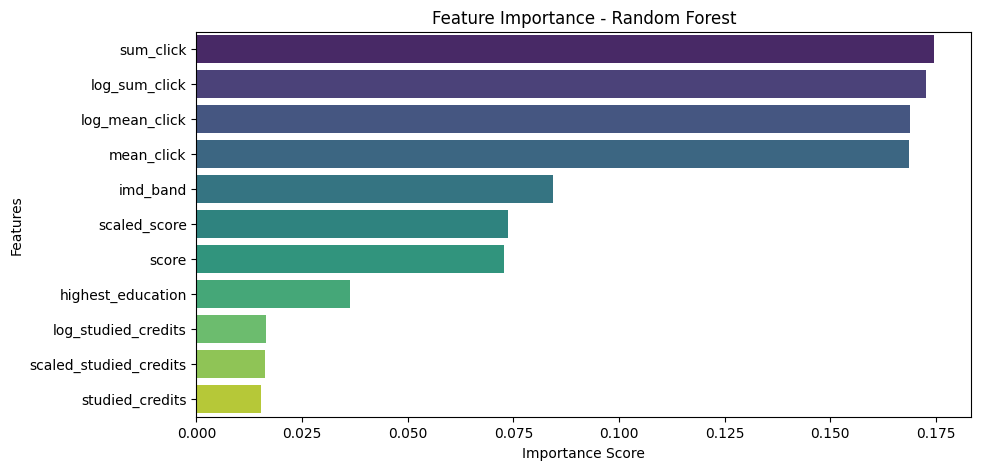

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report
from scipy.stats import randint

if __name__ == "__main__":
    # 1. 데이터 로드
    data = pd.read_csv('./data/final_merge_data.csv')

    # 2. 데이터 준비 (X: Feature, y: Target)
    X = data.drop(columns=['final_result', 'id_student','id_assessment','code_module']).to_numpy().astype(np.float64)  # ✅ NumPy 변환 (속도 개선)
    y = data['final_result'].to_numpy()

    # 3. 학습 데이터와 테스트 데이터 분리 (Train 80%, Test 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # 4. 스케일링 (랜덤 포레스트는 필요 없지만 일관성을 위해 적용)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train).astype(np.float64)
    X_test_scaled = scaler.transform(X_test).astype(np.float64)

    # 5. 기본 랜덤 포레스트 모델 학습
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)  # ✅ 기본 설정 유지
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)

    # 6. 성능 평가 (기본 모델)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    r2 = r2_score(y_test, y_pred)  # ✅ r2_score 추가

    print(f"\n=== 기본 Random Forest 성능 ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"R2 Score: {r2:.4f}")  # ✅ r2_score 출력
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 7. 하이퍼파라미터 튜닝 (RandomizedSearchCV 적용)
    param_dist = {
        'n_estimators': randint(100, 300),  # ✅ n_estimators 범위를 100~200으로 조정
        'max_depth': [5, 10, 20, None],  # ✅ 깊이를 최적화하여 과적합 방지
        'min_samples_split': [2, 5, 10],  # ✅ 탐색 범위 유지
        'min_samples_leaf': [1, 2, 4],  # ✅ 탐색 범위 유지
        'criterion': ['gini', 'entropy']
    }

    random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                       param_distributions=param_dist,
                                       n_iter=10,  # ✅ 10개의 랜덤 샘플링
                                       cv=5,  # ✅ 5-Fold Cross Validation
                                       scoring='accuracy',
                                       n_jobs=-1,
                                       random_state=42)
    random_search.fit(X_train_scaled, y_train)

    # 8. 최적의 하이퍼파라미터 및 성능 확인
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    print("\n=== 하이퍼파라미터 최적화 후 Random Forest 성능 ===")
    print(f"Best Parameters: {best_params}")

    # 9. 최적 모델 평가
    y_pred_best = best_model.predict(X_test_scaled)
    acc_best = accuracy_score(y_test, y_pred_best)
    f1_best = f1_score(y_test, y_pred_best, average='weighted')
    r2_best = r2_score(y_test, y_pred_best)  # ✅ r2_score 추가

    print(f"Best Accuracy: {acc_best:.4f}")
    print(f"Best F1 Score: {f1_best:.4f}")
    print(f"Best R2 Score: {r2_best:.4f}")  # ✅ r2_score 출력

    # 10. 혼동 행렬 시각화
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Withdrawn', 'Withdrawn'], yticklabels=['Not Withdrawn', 'Withdrawn'])
    plt.title("Confusion Matrix - Random Forest (Optimized)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # 11. Feature Importance 시각화
    feature_importances = pd.Series(best_model.feature_importances_, index=data.drop(columns=['final_result','id_student','id_assessment','code_module']).columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
    plt.title("Feature Importance - Random Forest")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

# 1. 데이터 로드
data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. 데이터 준비 (X: Feature, y: Target)
X = data.drop(columns=['final_result','id_student','id_assessment','code_module']).to_numpy().astype(np.float64)
y = data['final_result'].to_numpy()

# 3. 학습 데이터와 테스트 데이터 분리 (Train 80%, Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. 스케일링 (Gradient Boosting은 필요 없지만 일관성을 위해 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).astype(np.float64)
X_test_scaled = scaler.transform(X_test).astype(np.float64)

# 5. 기본 Gradient Boosting 모델 학습
gbm_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train_scaled, y_train)
y_pred = gbm_model.predict(X_test_scaled)

# 6. 성능 평가 (기본 모델)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
r2 = r2_score(y_test, y_pred)

print(f"\n=== 기본 Gradient Boosting 성능 ===")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"R2 Score: {r2:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. 하이퍼파라미터 튜닝 (GridSearchCV 적용)
param_grid = {
    'n_estimators': [100, 150],  # 트리 개수
    'learning_rate': [0.15],  # 학습률
    'max_depth': [10],  # 트리 깊이
    'min_samples_split': [2, 5, 10],  # 내부 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]  # 리프 노드 최소 샘플 수
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                           param_grid,
                           cv=3,  # ✅ 3-Fold Cross Validation (속도 최적화)
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 8. 최적의 하이퍼파라미터 및 성능 확인
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("\n=== 하이퍼파라미터 최적화 후 Gradient Boosting 성능 ===")
print(f"Best Parameters: {best_params}")

# 9. 최적 모델 평가
y_pred_best = best_model.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best) * 100
f1_best = f1_score(y_test, y_pred_best, average='weighted') * 100
r2_best = r2_score(y_test, y_pred_best) * 100

print(f"Best Accuracy: {acc_best:.4f}")
print(f"Best F1 Score: {f1_best:.4f}")
print(f"Best R2 Score: {r2_best:.4f}")

# 10. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Withdrawn', 'Withdrawn'], yticklabels=['Not Withdrawn', 'Withdrawn'])
plt.title("Confusion Matrix - Gradient Boosting (Optimized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 11. Feature Importance 시각화
feature_importances = pd.Series(best_model.feature_importances_, index=data.drop(columns=['final_result','id_student','id_assessment','code_module']).columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [147932, 166424]

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

# 1. 데이터 로드
data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. 데이터 준비 (X: Feature, y: Target)
X = data.drop(columns=['final_result', 'id_student', 'id_assessment', 'code_module']).to_numpy().astype(np.float64)
y = data['final_result'].to_numpy()

# 3. 학습 데이터와 테스트 데이터 분리 (Train 80%, Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. 스케일링 (SVM에서는 필수)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).astype(np.float64)
X_test_scaled = scaler.transform(X_test).astype(np.float64)

# 5. 기본 SVM 모델 학습
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

# 6. 성능 평가 (기본 모델)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
r2 = r2_score(y_test, y_pred)

print(f"\n=== 기본 SVM 성능 ===")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"R2 Score: {r2:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. 하이퍼파라미터 튜닝 (GridSearchCV 적용)
param_grid = {
    'C': [0.1, 1, 10, 100],  # 규제 강도 (클수록 과적합 가능성 높음)
    'kernel': ['linear', 'rbf', 'poly'],  # 커널 종류
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # RBF, Poly 커널에서 사용됨
}

grid_search = GridSearchCV(SVC(random_state=42),
                           param_grid,
                           cv=3,  # 3-Fold Cross Validation (속도 최적화)
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 8. 최적의 하이퍼파라미터 및 성능 확인
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("\n=== 하이퍼파라미터 최적화 후 SVM 성능 ===")
print(f"Best Parameters: {best_params}")

# 9. 최적 모델 평가
y_pred_best = best_model.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best) * 100
f1_best = f1_score(y_test, y_pred_best, average='weighted') * 100
r2_best = r2_score(y_test, y_pred_best) * 100

print(f"Best Accuracy: {acc_best:.4f}")
print(f"Best F1 Score: {f1_best:.4f}")
print(f"Best R2 Score: {r2_best:.4f}")

# 10. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Withdrawn', 'Withdrawn'], yticklabels=['Not Withdrawn', 'Withdrawn'])
plt.title("Confusion Matrix - SVM (Optimized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




=== 기본 SVM 성능 ===
Accuracy: 0.8679
F1 Score: 0.8079
R2 Score: -0.1450

Confusion Matrix:
[[   42  4878]
 [    6 32058]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.01      0.02      4920
           1       0.87      1.00      0.93     32064

    accuracy                           0.87     36984
   macro avg       0.87      0.50      0.47     36984
weighted avg       0.87      0.87      0.81     36984



KeyboardInterrupt: 


=== 최적화된 Random Forest 성능 ===
Accuracy: 0.9518
F1 Score: 0.9506

Confusion Matrix:
[[ 3769  1151]
 [  633 31431]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      4920
           1       0.96      0.98      0.97     32064

    accuracy                           0.95     36984
   macro avg       0.91      0.87      0.89     36984
weighted avg       0.95      0.95      0.95     36984



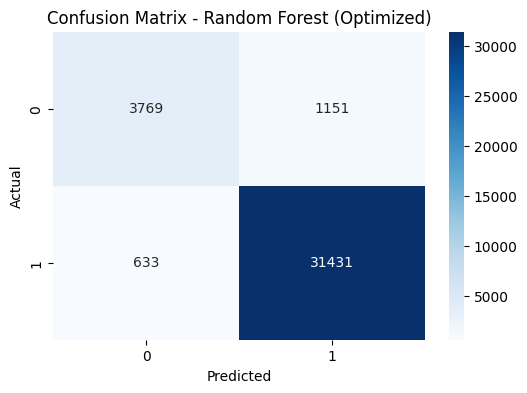

C:\Users\woori\AppData\Local\Temp\ipykernel_19544\1908868279.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


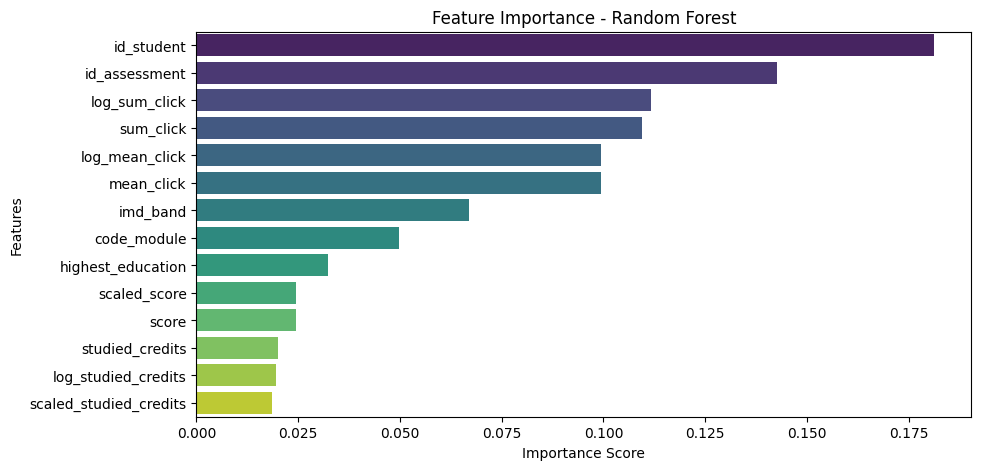

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

if __name__ == "__main__":
    # 1. 데이터 로드
    data = pd.read_csv('./data/final_merge_data.csv')

    # 2. 데이터 준비 (X: Feature, y: Target)
    X = data.drop(columns=['final_result', 'id_student', 'id_assessment', 'code_module']).to_numpy().astype(np.float64)
    y = data['final_result'].to_numpy()

    # 3. 학습 데이터와 테스트 데이터 분리 (Train 80%, Test 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # 4. 스케일링 적용
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train).astype(np.float64)
    X_test_scaled = scaler.transform(X_test).astype(np.float64)

    # 5. 최적화된 랜덤 포레스트 모델 학습
    rf_model = RandomForestClassifier(
        random_state=42,
        n_estimators=124,
        max_depth=30,
        min_samples_split=11,
        min_samples_leaf=1,
        max_features=None,
        criterion='entropy'
    )
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)

    # 6. 성능 평가
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n=== 최적화된 Random Forest 성능 ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 7. 혼동 행렬 시각화
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix - Random Forest (Optimized)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # 8. Feature Importance 시각화
    feature_importances = pd.Series(rf_model.feature_importances_, index=data.drop(columns=['final_result', 'id_student', 'id_assessment', 'code_module']).columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
    plt.title("Feature Importance - Random Forest")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()



=== 최적화된 Random Forest 성능 ===
Accuracy: 0.8997
F1 Score: 0.8851

Confusion Matrix:
[[ 1853  3067]
 [  642 31422]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.38      0.50      4920
           1       0.91      0.98      0.94     32064

    accuracy                           0.90     36984
   macro avg       0.83      0.68      0.72     36984
weighted avg       0.89      0.90      0.89     36984


=== 하이퍼파라미터 최적화 후 Random Forest 성능 ===
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 441}
Best Accuracy: 0.8988
Best F1 Score: 0.8894


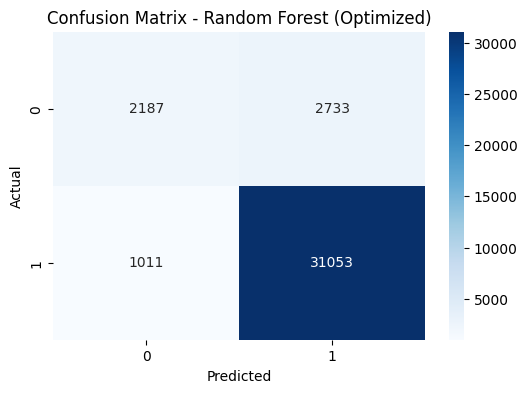

C:\Users\woori\AppData\Local\Temp\ipykernel_19544\1972198588.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


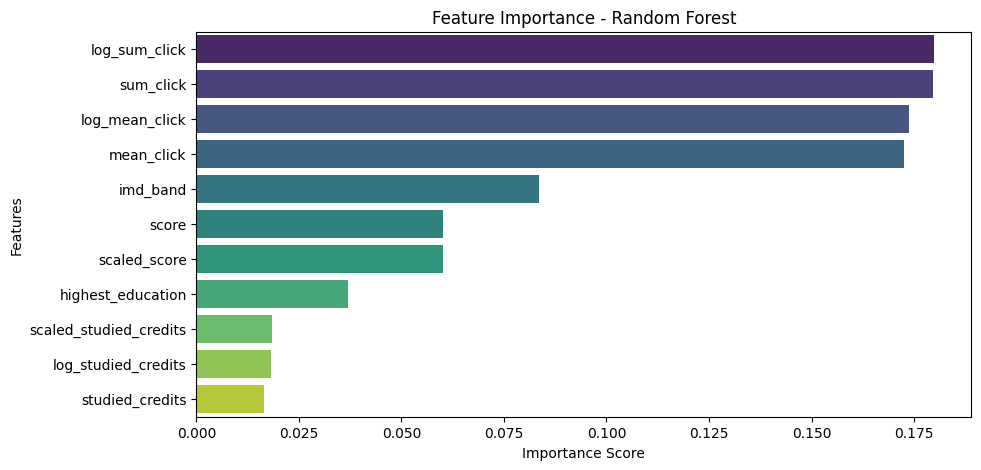

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from scipy.stats import randint

if __name__ == "__main__":
    # 1. 데이터 로드
    data = pd.read_csv('./data/final_merge_data.csv')

    # 2. 데이터 준비 (X: Feature, y: Target)
    X = data.drop(columns=['final_result', 'id_student', 'id_assessment', 'code_module']).to_numpy().astype(np.float64)
    y = data['final_result'].to_numpy()

    # 3. 학습 데이터와 테스트 데이터 분리 (Train 80%, Test 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # 4. 스케일링 적용
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train).astype(np.float64)
    X_test_scaled = scaler.transform(X_test).astype(np.float64)

    # 5. 랜덤 포레스트 모델 학습 (최적화 적용)
    rf_model = RandomForestClassifier(
        random_state=42,
        n_estimators=300,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=False
    )
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)

    # 6. 성능 평가
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n=== 최적화된 Random Forest 성능 ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 7. 하이퍼파라미터 튜닝 (RandomizedSearchCV 적용)
    param_dist = {
        'n_estimators': randint(200, 500),
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [5, 10, 15],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }

    random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                       param_distributions=param_dist,
                                       n_iter=15,
                                       cv=5,
                                       scoring='accuracy',
                                       n_jobs=-1,
                                       random_state=42)
    random_search.fit(X_train_scaled, y_train)

    # 8. 최적 모델 평가
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    print("\n=== 하이퍼파라미터 최적화 후 Random Forest 성능 ===")
    print(f"Best Parameters: {best_params}")

    y_pred_best = best_model.predict(X_test_scaled)
    acc_best = accuracy_score(y_test, y_pred_best)
    f1_best = f1_score(y_test, y_pred_best, average='weighted')

    print(f"Best Accuracy: {acc_best:.4f}")
    print(f"Best F1 Score: {f1_best:.4f}")

    # 9. 혼동 행렬 시각화
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix - Random Forest (Optimized)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # 10. Feature Importance 시각화
    feature_importances = pd.Series(best_model.feature_importances_, index=data.drop(columns=['final_result', 'id_student', 'id_assessment', 'code_module']).columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
    plt.title("Feature Importance - Random Forest")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()
